In [28]:
using JuMP
using GLPK
#using Xpress
using Plots

## Q1
Find an optimal solution to the instance of the Diet problem that was provided in Lectures 4, i.e.,


$$Minimise\ 20x_1+8x_2$$

<div style="text-align: center"> Subject to constraint: </div>

$$32x_1 + 12x_2 \ge 24 $$
$$8x_1 + 20x_2 \ge 12 $$
$$x_1 + x_2 \ge 1$$

$$x_1\ge 0,x_2\ge 0$$



In [32]:
model= Model(GLPK.Optimizer)
#model = Model(Xpress.Optimizer)
# Decision Variables
# Create one variable for each Decision Variables
@variable(model, x1 >= 0 )
@variable(model, x2 >= 0 )
# Constraints
@constraint(model, 32x1 + 12x2 >= 24)
@constraint(model, 8x1 + 20x2 >= 12)
@constraint(model, x1 + x2 >= 1)
# Objective function:
#  Min Z=20x1 + 8x2
@objective(model, Min, 20x1 + 8x2)
optimize!(model)

println("x1 value: ",value(x1))
println("x2 value: ",value(x2))
println("objective value: ",objective_value(model))

x1 value: 0.6
x2 value: 0.39999999999999997
objective value: 15.2


# Exercise Question
## Q1 
Solve the other example from the lecture in a similar way. The example was as follows:
A company manufactures 2 kinds of staplers: regular and heavy duty. Each regular stapler requires 2 hours of assembly time and 1 hour of finishing time per week, while each heavy duty stapler requires 4 hours of assembly time and 3 hours of finishing time per week. The assembly department has at most 160 hours available per week, and the finishing department has at most 105 hours available. Each regular stapler contributes Euro15 to profits, and each heavy duty stapler contributes Euro 32. 

How many of each kind of stapler should the company manufacture this week in order to maximise profits (assuming all staplers made are sold)?

In [35]:
# Model
model= Model(GLPK.Optimizer)

# Variables
@variable(model, x1 >= 0 )
@variable(model, x2 >= 0 )

# Constraints
@constraint(model, 2x1 + 4x2 <= 160)
@constraint(model, 1x1 + 3x2 <= 105)

# Objective function:
@objective(model, Max, 15x1 + 32x2)
optimize!(model)

# Print
println("For the regulat stapler (x1 value), you need to produce : ",value(x1)," units.")
println("For the heavy duty stapler (x2 value), you need to produce : ",value(x2)," units.")
println("The total profit (objective value) in euro is : ",objective_value(model))

For the regulat stapler (x1 value), you need to produce : 29.999999999999996 units.
For the heavy duty stapler (x2 value), you need to produce : 25.0 units.
The total profit (objective value) in euro is : 1250.0


## Q2 
Reddy Mikks produces both interior and exterior paints from two raw materials, M1 and M2. The following table provides the basic data of the problem:

|  | Exterior Paint | Interior Paint | Maximum Daily Availability (tons) |
| :- | :-: | :-: | :-: |
| Raw material, M1 | 6 | 4 | 24 |
| Raw material, M2 | 1 | 2 | 6 |
| Profit per ton (in 1000s of Euro) | 5 | 4 |  |

It means that producing one ton of interior paint requires 4 tons of raw material M1 and 2 tons of raw material M2. 
Express the following constraints with a linear left-hand side and a constant right-hand side:

(a) The daily demand for interior paint exceeds that of exterior paint by at least 1 ton.

(b) The daily usage of raw material M1 in tons is at most 8 and at least 5.

(c) The demand for exterior paint cannot be less than the demand for interior paint.

(d) The maximum quantity that should be produced of the interior and the exterior paint together is 15 tons.

(e) The proportion of exterior paint to the total production of both interior and exterior paints must not exceed .3.


In [38]:
println("Question (a) :")
println("i - e >= 1")

println("\nQuestion (b) :")
println("5 <= 6e + 4i <= 8")

println("\nQuestion (c) :")
println("e - i >= 0")

println("\nQuestion (d) :")
println("e + i <= 15")

println("\nQuestion (e) :")
println(" e/(e + i) <= 0.3")

Question (a) :
i - e >= 1

Question (b) :
5 <= 6e + 4i <= 8

Question (c) :
e - i >= 0

Question (d) :
e + i <= 15

Question (e) :
 e/(e + i) <= 0.3


## Q3 
A bond portfolio manager has $100,000 to allocate to two
different bonds; one corporate and one government bond. The corporate bond has a yield of 4\%, a maturity of 3 years and an A rating from a rating agency that is translated into a numerical rating of 2 for computational purposes. In contrast, the government bond has a yield of 3\%, a maturity of 4 years and rating of AAA with the corresponding numerical rating of 1 (lower numerical ratings correspond to higher quality bonds). The portfolio manager would like to allocate her funds so that the average rating for the portfolio is no worse than AA (numerical equivalent 1.5) and average maturity of the portfolio is at most 3.6 years. Any amount not invested in the two bonds will be kept in a cash account that is assumed to earn no interest for simplicity. Also, we assume a quality rating of ”perfect” (numerical rating of 0) quality, and maturity of 0 years for cash How should the manager allocate her funds between these two bonds to achieve her objective of maximizing the yield from this investment?

In [41]:
# Model
model= Model(GLPK.Optimizer)

# Variables
@variable(model, c >= 0 )
@variable(model, g >= 0 )
@variable(model, eur >= 0 )

# Constraints
@constraint(model, c + g + eur <= 100000)
@constraint(model, (3c + 4g)/100000 <= 3.6)
@constraint(model, (2c + 1g)/100000 <= 1.5)

# Objective function:
@objective(model, Max, 1.04c + 1.03g + eur)
optimize!(model)

# Print
println("For the corporate bond (c), you need to invest : ",value(c))
println("For the government bond (g), you need to invest : ",value(g))
println("For the euro (eur), you need to invest : ",value(eur))
println("The total profit (objective value) in euro is : ",objective_value(model) - 100000)

For the corporate bond (c), you need to invest : 49999.99999999997
For the government bond (g), you need to invest : 50000.000000000044
For the euro (eur), you need to invest : 0.0
The total profit (objective value) in euro is : 3500.0000000000146


## Q4
Pollution Control: Three types of coal, C1, C2, and C3, are pulverized and mixed together to produce 50 tons per hour needed to power a plant for generating electricity. The burning of coal emits sulphur oxide (in parts per million) which must meet the EPA specifications of no more than 2000 parts per million. The following table summarizes the data of the situation:

|  | C1 | C2 | C3 |
| :- | :-: | :-: | :-: |
| Sulphur (parts per million) | 2500 | 1500 | 1600 |
| Pulverizer capacity (ton/hr) | 30 | 30 | 30 |
| Cost per ton (in Euro) | 30 | 35 | 33 |

Determine the optimal mix of the coals.

In [44]:
# Model
model= Model(GLPK.Optimizer)

# Variables
@variable(model, c1 >= 0 )
@variable(model, c2 >= 0 )
@variable(model, c3 >= 0 )

# Constraints
@constraint(model, 2500c1 + 1500c2 + 1600c3 <= 100000)
@constraint(model, c1 + c2 + c3 == 50)
@constraint(model, c1 <= 30)
@constraint(model, c2 <= 30)
@constraint(model, c3 <= 30)

# Objective function:
@objective(model, Min, 30c1 + 35c2 + 33c3)
optimize!(model)

# Print
println("For the coal C1 (c1), you need to use (in tons) : ",value(c1))
println("For the coal C2 (c2), you need to use (in tons) : ",value(c2))
println("For the coal C3 (c3), you need to use (in tons) : ",value(c3))
println("The cost per ton in euro (objective value) is : ",objective_value(model))

For the coal C1 (c1), you need to use (in tons) : 22.222222222222236
For the coal C2 (c2), you need to use (in tons) : 0.0
For the coal C3 (c3), you need to use (in tons) : 27.777777777777757
The cost per ton in euro (objective value) is : 1583.333333333333


## Q5
Shale Oil, located on the island of Aruba, has a capacity of 1,500,000 bbl of crude oil per day. The final products from the refinery include three types of unleaded gasoline with different octane numbers (ON): regular with ON = 87, premium with ON = 89, and super with ON = 92. The refining process encompasses three stages: (1) a distillation tower that produces feedstock (ON = 82) at the rate of .2 bbl per bbl of crude oil, (2) a cracker unit that produces gasoline stock (ON = 98) by using a portion of the feedstock produced from the distillation tower at the rate of .5 bbl per bbl of feedstock, and (3) a blender unit that blends the gasoline stock from the cracker unit and the feedstock from the distillation tower. The company estimates the net profit per barrel of the three types of gasoline to be Euro 6.70, Euro 7.20, and Euro 8.10, respectively. The input capacity of the cracker unit is 200,000 bbl of feedstock a day. The demand limits for regular, premium, and super gasoline are 50,000, 30,000, and 40,000 bbl, respectively, per day. Note that the octane number of a gasoline product is the weighted average of the octane numbers of the input streams used in the blending process. Develop a model for determining the optimum production schedule for the refinery.

Hint: The variables can be defined in terms of two input streams to the blender (feedstock and cracker gasoline) and the three final products. Let
$x_{ij} =$ bbl/day of input stream $i$ used to blend final product $j, i = 1,2; j = 1,2,3$. The figure below summarises the elements of the model:

In [54]:
# Model
model= Model(GLPK.Optimizer)

# Variables
@variable(model, x11 >= 0 )
@variable(model, x12 >= 0 )
@variable(model, x13 >= 0 )
@variable(model, x21 >= 0 )
@variable(model, x22 >= 0 )
@variable(model, x23 >= 0 )
#@variable(model, y >= 0 )

# Constraints
@constraint(model, (x11+x21) >= 50000)
@constraint(model, (x12+x22) >= 30000)
@constraint(model, (x13+x23) >= 40000)

@constraint(model, x11 + x12 + x13 + 2(x21 + x22 + x23) <= 300000)
@constraint(model, x21 + x22 + x23 <= 200000)
#@constraint(model, x21 + x22 + x23 <= 0.5 * y)

@constraint(model, 82x11 + 98x21 >= 87(x11+x21))
@constraint(model, 82x12 + 98x22 >= 89(x12+x22))
@constraint(model, 82x13 + 98x23 >= 92(x13+x23))

# Objective function:
@objective(model, Max, 6.7(x11+x21) + 7.2(x12+x22) + 8.1(x13+x23))
optimize!(model)

# Print
#=println("Value for x11 : ",value(x11))
println("Value for x12 : ",value(x12))
println("Value for x13 : ",value(x13))
println("Value for x21 : ",value(x21))
println("Value for x22 : ",value(x22))
println("Value for x23 : ",value(x23))

println("\nValue for (x11+x12+x13) : ",value(x11+x12+x13))
println("Value for 2(x21+x22+x23) : ",value(2(x21+x22+x23)))
println("Value for x11+x12+x13 + 2(x21+x22+x23) : ",value(x11+x12+x13+2(x21+x22+x23)))=#

println("\nFor the Regular (x11+x21), you produce (in bbl) : ",value(x11+x21))
println("For the Premium (x12+x22), you produce (in bbl) : ",value(x12+x22))
println("For the Super (x13+x23), you produce (in bbl) : ",value(x13+x23))
println("The benefit in euro (objective value) is : ",objective_value(model))


For the Regular (x11+x21), you produce (in bbl) : 146190.47619047615
For the Premium (x12+x22), you produce (in bbl) : 30000.0
For the Super (x13+x23), you produce (in bbl) : 40000.0
The benefit in euro (objective value) is : 1.5194761904761903e6


## Q6 
Consider the following tour of a graph with 5 nodes A,B,C,D and E. You may consider
A to be the starting point of the tour.

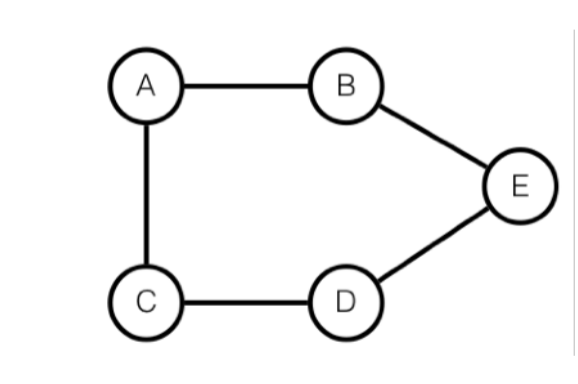

(i) Give all the 2-change neighbours of this tour (note that 2 tours that differ only in their
direction, i.e., have the same set of edges, are to be counted as being the same).

(ii) In a graph with n nodes, how many 2-change neighbours of any given tour are there?

In [52]:
println("Question (i) :")
println("There are 5 n-changes:
    \n A → C → D → B → E → A
    \n A → D → E → B → C → A
    \n A → B → D → E → C → A
    \n A → B → C → D → E → A
    \n A → B → E → C → D → A")

println("\nQuestion (ii) :")
println("With n nodes, there are (n(n-3))/2 combinations of 2-changes.")

Question (i) :
There are 5 n-changes:
    
 A → C → D → B → E → A
    
 A → D → E → B → C → A
    
 A → B → D → E → C → A
    
 A → B → C → D → E → A
    
 A → B → E → C → D → A

Question (ii) :
With n nodes, there are (n(n-3))/2 combinations of 2-changes.
